In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
from pandas import Series, DataFrame, read_csv


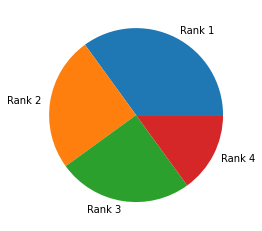

In [3]:

y = np.array([35, 25, 25, 15])
mylabels = ["Rank 1", "Rank 2", "Rank 3", "Rank 4"]

plt.pie(y, labels = mylabels)
plt.show() 

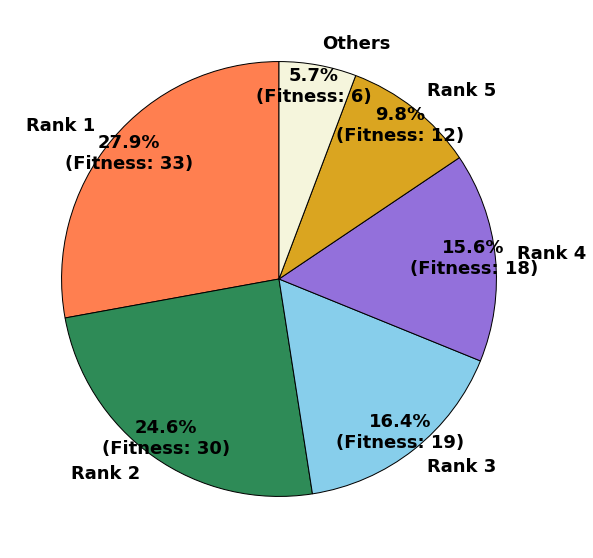

In [20]:
labels = ["Rank 1", "Rank 2", "Rank 3", "Rank 4", "Rank 5", "Others"]
data = [34, 30, 20, 19, 12, 7]
colors = ( "coral", "seagreen", "skyblue", "mediumpurple", "goldenrod", "beige")
 
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
 
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n(Fitness: {:d})".format(pct, absolute)
 
fig, ax = plt.subplots(figsize =(15, 10))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  labels = labels,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  labeldistance=1.1,
                                  pctdistance=0.9
                                  )
 
# plt.setp(autotexts, size = 12, weight ="bold")
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}
plt.rc('font', **font)

# ax.set_title("    Roulette wheel selection", fontsize = 40, fontweight=800)

plt.show()

-1000 0


<AxesSubplot:>

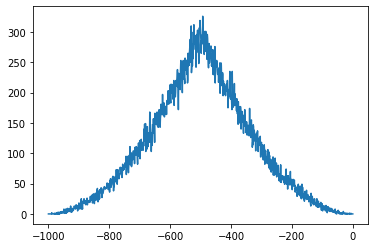

In [65]:
def closestToTarget(p, target, size, amount):
    upperLim = size//2 + target
    lowerLim = target - size//2
    print(lowerLim, upperLim)
    distribution = {i:0 for i in range(lowerLim, upperLim+1)}
    for _ in range(amount):
        c = 100000
        index = 0
        for i, v in enumerate([random.randint(lowerLim, upperLim) for _ in range(p)]):
            if abs(v - target) < c:
                c = abs(v)
                index = i
        distribution[v] += 1
    Series(distribution).plot()



target = -500
size = 1000
upperLim = size//2 + target
lowerLim = target - size//2
print(lowerLim, upperLim)
distribution = {i:0 for i in range(lowerLim, upperLim+1)}

def closestToTarget(p, target):
    c = 100000
    va = 0
    for i, v in enumerate([random.randint(lowerLim, upperLim) for _ in range(p)]):
        if abs(v - target) < c:
            c = abs(v - target)
            va = v
    return va

def choo(n):
    # print([random.randint(size, size) for _ in range(n)])
    return closestToTarget(n, target)

for _ in range(100000):
    index = choo(3)
    
    distribution[index] += 1
distribution
Series(distribution).plot()


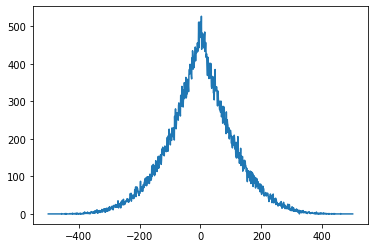

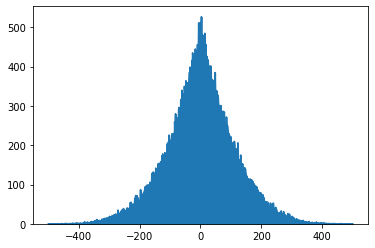

In [183]:
def closestToTarget(p, target, size, amount):
    upperLim = size//2 + target
    lowerLim = target - size//2
    distribution = {i:0 for i in range(lowerLim, upperLim+1)}
    for _ in range(amount):
        c = 100000
        val = 0
        for _, v in enumerate([random.randint(lowerLim, upperLim) for _ in range(p)]):
            if abs(v - target) < c:
                c = abs(v - target)
                val = v
        distribution[val] += 1
    Series(distribution).plot()
    plt.show()
    Series(distribution).plot(kind="area")

target = 0
size = 1000
amount = 100000
closestToTarget(5, target, size, amount)
# plt.show()

# upperLim = size//2 + target
# lowerLim = target - size//2

# distribution = {i:0 for i in range(lowerLim, upperLim+1)}
# for i in range(10000):
#     v = int(random.gauss(target, 200))
#     if v > upperLim or v < lowerLim: continue
#     distribution.setdefault(v, 0)
#     distribution[v] += 1
# Series(distribution).plot()

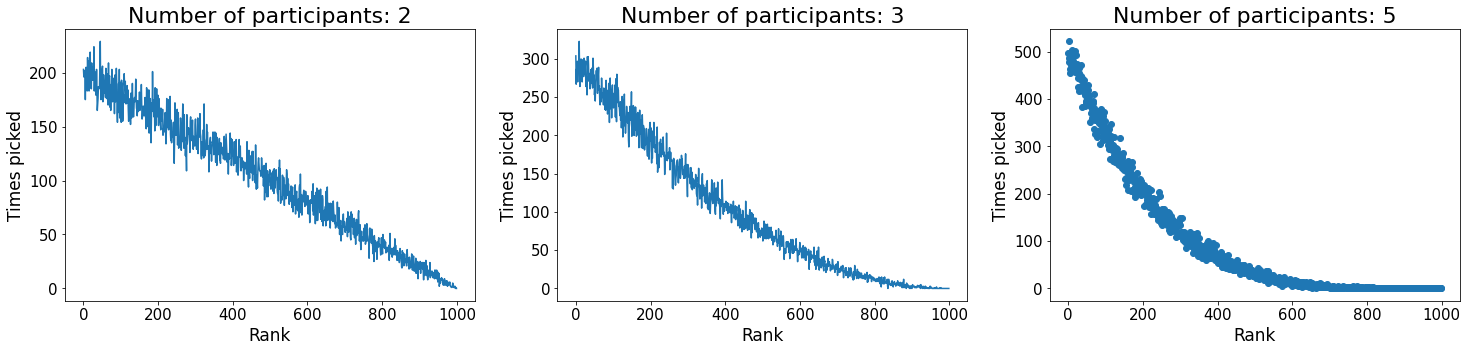

In [250]:
def tournamentDistribution(samples):
    size = 1000
    distribution = {i:0 for i in range(size)}

    def chooseParent(n):
        return min([random.randint(0, size-1) for _ in range(n)])
    
    for _ in range(100000):
        index = chooseParent(samples)
        distribution[index] += 1
    return distribution

td2 = tournamentDistribution(2)
td3 = tournamentDistribution(3)
td5 = tournamentDistribution(5)
td7 = tournamentDistribution(7)

fontsize = 22

plt.figure(figsize=(25,5))

plt.subplot(131)
plt.plot(td2.keys(), td2.values())
plt.ylabel("Times picked", fontsize=int(fontsize*0.8))
plt.xlabel("Rank", fontsize=int(fontsize*0.8))
plt.title("Number of participants: 2", fontsize = fontsize)

plt.subplot(132)
plt.plot(td3.keys(), td3.values())
plt.ylabel("Times picked", fontsize=int(fontsize*0.8))
plt.xlabel("Rank", fontsize=int(fontsize*0.8))
plt.title("Number of participants: 3", fontsize = fontsize)

plt.subplot(133)
plt.scatter(td5.keys(), td5.values())
plt.ylabel("Times picked", fontsize=int(fontsize*0.8))
plt.xlabel("Rank", fontsize=int(fontsize*0.8))
plt.title("Number of participants: 5", fontsize = fontsize)

plt.show()



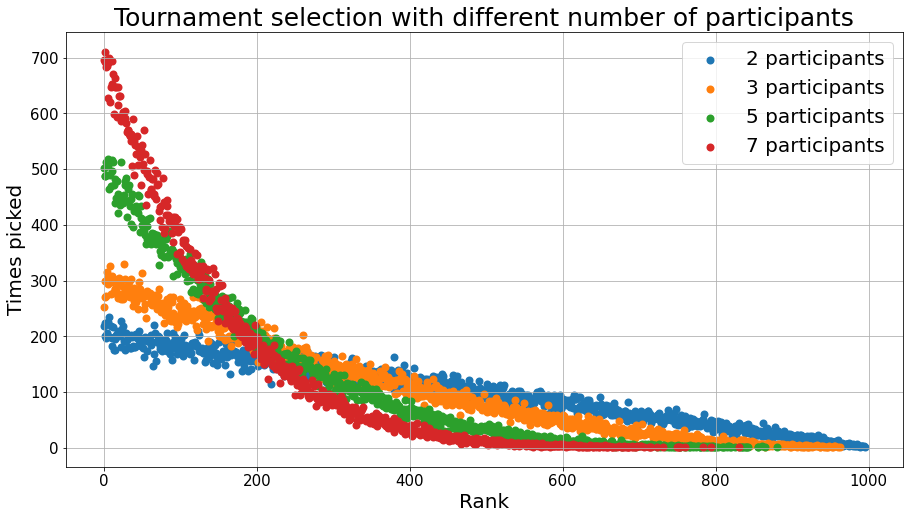

In [264]:
# td2 = tournamentDistribution(2)
# td3 = tournamentDistribution(3)
# td5 = tournamentDistribution(5)
# td8 = tournamentDistribution(8)

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


def plottingTournament(participants):
    legend = []
    plt.figure(figsize=(15,8))
    for p in participants:
        legend.append(f"{p} participants")
        td = tournamentDistribution(p)
        td = {k: v for k, v in td.items() if v}
        plt.scatter(td.keys(), td.values(), marker="o", alpha=1, edgecolors=None, linewidths=2)
        # plt.plot(td.keys(), td.values(), linewidth=2)

    plt.ylabel("Times picked")
    plt.xlabel("Rank")
    plt.legend(legend)
    plt.title("Tournament selection with different number of participants", fontsize=BIGGER_SIZE)
    plt.grid()
    plt.show()

plottingTournament([2,3,5,7])


In [88]:
def plotInfo(model, sizes=None, saveFigs=False):
    info = read_csv(f"../data/fromUsingSim/{model}.csv")
    model = model[model.find("/")+1:] if model.find("/") else model
    infoDict = info.to_dict("list")

    labels = [
        "TTC (s)",
        "DTO (m)",
        "Speed (m/s)",
        # "Jerk (m/s^3)", 
        # "Acceleration (m/s^2)",
        "Predicted collision",
        "Collisions"
        ]
    cols = [
        "ttc", 
        "dto", 
        "speed", 
        # "jerks", 
        # "accelerations", 
        "predictions", 
        "col"]
    if not sizes:
        sizes = {
            "figureSize" : (15,10),
            "font_xs" : 15,
            "font_s" : 20,
            "font_m" : 25,
            "font_l" : 25,
            "lines" : 5
            }

    # for col in ["predictions", "col"]:
    #     for i, val in enumerate(info[col]):
    #         if val == 1:
    #             infoDict[col][i] = 5

    plt.figure(figsize=sizes["figureSize"])
    for col, label in zip(cols, labels):
        if col == "col":
            infoDict[col] = [value * -6 for value in infoDict[col]]
            plt.plot(infoDict["time"], infoDict[col], linestyle="dashdot", label=label, linewidth=sizes["lines"])
            continue
        if col == "predictions":
            infoDict[col] = [value * -3 for value in infoDict[col]]
            plt.scatter(infoDict["time"], infoDict[col], label=label, linewidth=sizes["lines"])
            continue
        # print(col, infoDict[col])
        plt.plot(infoDict["time"], infoDict[col], label=label, linewidth=sizes["lines"])

    plt.xlabel(f"Time, delta = {infoDict['interval'][0]} s, duration = {infoDict['duration'][0]} s", fontsize=sizes["font_m"])
    plt.xticks(fontsize=sizes["font_s"])
    plt.yticks(fontsize=sizes["font_s"])
    plt.legend(fontsize=sizes["font_m"])
    plt.grid()
    plt.title(f"Model: {model}", fontsize=sizes["font_l"])
    if saveFigs:
        plt.savefig(f"../data/figures/{model}")
    plt.show()
    


folder = "usedInPoster"
modelsFromPoster = [
        "MLPClassifier_deep_577-16-29-188",
        "RandomForestClassifier_deep_583-10-28-189",
        "SVC_deep_582-11-70-147",
        "XGBClassifier_deep_582-11-16-201",
        "MLPClassifier_gen_PI4_RBC5_63-36-34-66",
        "RandomForestClassifier_gen_PI4_RBC5_76-37-21-65",
        "SVC_gen_PI4_RBC5_75-35-22-67",
        "XGBClassifier_gen_PI4_RBC5_74-23-32-70"
    ]

# for model in modelsFromPoster:
#     plotInfo(f"{folder}/{model}")

In [ ]:
sizes = {
        "figureSize" : (12,8),
        "font_xs" : 5,
        "font_s" : 5,
        "font_m" : 10,
        "font_l" : 15,
        "lines" : 2
        }

folder = "notUSAC"
modelsNotUSAC = [
        "MLPClassifier_deep_notUSAC_571-22-26-191_s6",
        "RandomForestClassifier_deep_notUSAC_582-11-26-191_s6",
        "SVC_deep_notUSAC_581-12-71-146_s6",
        "XGBClassifier_deep_notUSAC_581-12-22-195_s6",
    ]
    

for model in modelsNotUSAC:
    plotInfo(f"{folder}/{model}", sizes)

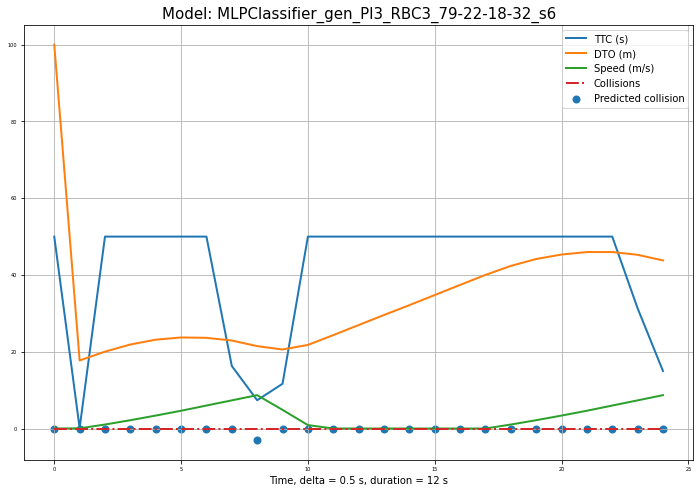

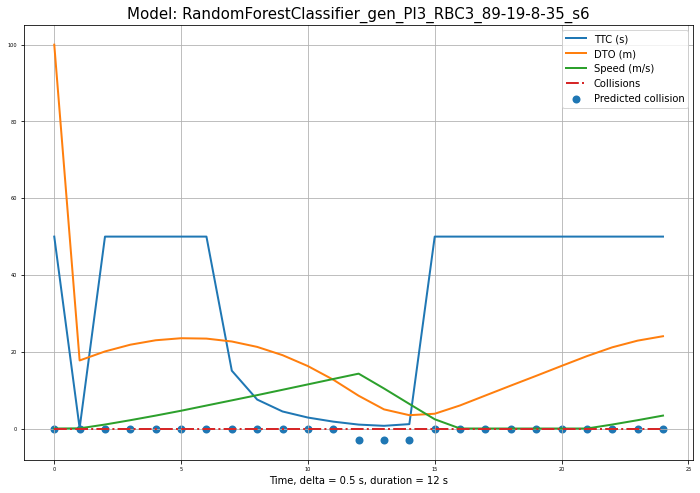

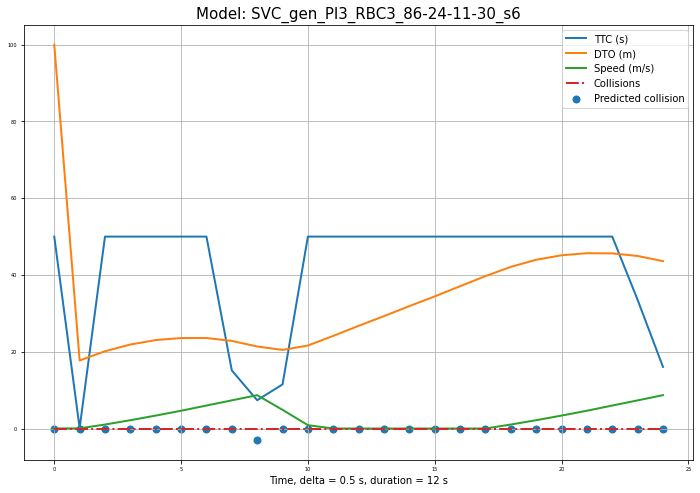

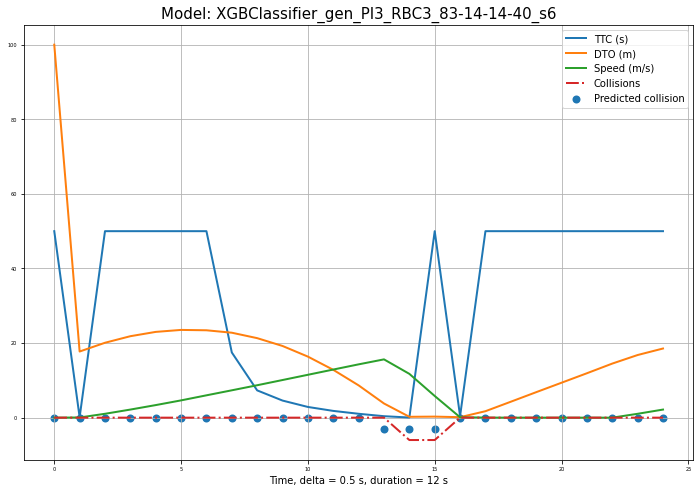

In [89]:
sizes = {
        "figureSize" : (12,8),
        "font_xs" : 5,
        "font_s" : 5,
        "font_m" : 10,
        "font_l" : 15,
        "lines" : 2
        }

# folder = "notUSAC"
models = [
        "MLPClassifier_deep_577-16-29-188_s6",
        "RandomForestClassifier_deep_583-10-28-189_s6",
        "SVC_deep_582-11-70-147_s6",
        "XGBClassifier_deep_582-11-16-201_s6",
        "MLPClassifier_gen_PI4_RBC5_63-36-34-66_s6",
        "RandomForestClassifier_gen_PI4_RBC5_76-37-21-65_s6",
        "SVC_gen_PI4_RBC5_75-35-22-67_s6",
        "XGBClassifier_gen_PI4_RBC5_74-23-32-70_s6"
    ]
    


models3_3 = [
        "MLPClassifier_gen_PI3_RBC3_79-22-18-32_s6",
        "RandomForestClassifier_gen_PI3_RBC3_89-19-8-35_s6",
        "SVC_gen_PI3_RBC3_86-24-11-30_s6",
        "XGBClassifier_gen_PI3_RBC3_83-14-14-40_s6"
    ]
model = "MLPClassifier_deep_577-16-29-188_s6"



for model in models3_3:
    plotInfo(model, sizes)

In [1]:
from geneticAlgorithms.geneticAlgorithm import GeneticAlgorithm
from geneticAlgorithms.useGeneticAlgorithm import printSols

In [2]:
ga = GeneticAlgorithm(
                 populationLimit=100,
                 maxGenerations=100,
                 maxValues=[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.463,-0.463,-0.553,-0.553,-1.539,-1.539,-1.539,-1.539,-1.684,-1.684,-0.611,-0.611],
                 minValues=[50.0,50.0,50.0,50.0,100.0,100.0,100.0,100.0,89.18,89.18,89.18,56.688,33.352,34.721,33.352,34.721,1.158,1.158,0.49,0.49,1.407,1.468,1.468,1.468,1.079,1.079,0.884,0.884],
                 numberOfVariables=28,
                 tmParticipants=3,
                 variation=5,
                 mutationChance=0.4,
                 fitnessGoal = 10000,
                 toKeep=4)
individuals = ga.run()
print(individuals[:10])
printSols(individuals[:10])

=== Gen 0 best individual ===
	Fitness: 0.01519521      Values: (35.0081449743409, 6.8151447243779515, 1.63233435180544, 30.969160347286856, 71.90342040893412, 9.904095829530917, 52.18954311812168, 85.423046822413, 13.278992696127332, 69.42736458392856, 71.9852241277249, 8.6400330358303, 9.670645113060242, 3.936692692325412, 17.962703036173757, 0.6609880804067174, -0.19431172285422438, 0.8244158629394368, -0.24878491758571442, 0.23012206285373898, -1.16406826947253, -1.3985451211227882, -0.545151900688869, 0.6352119297956637, -0.13467949470990392, -1.25660292817659, 0.41308171324853055, 0.2732419092728705)

=== Best individual after 100 generations ===
	Fitness: 1.63550034      Values: (10.825208320761767, 12.519212292235387, 1.5162581058124687, 3.2198236719661892, 66.591806541892, 32.901963541665864, 7.620607592467323, 4.225687219124978, 4.103305642952947, 36.472620077077025, 36.98490788740104, 14.033406994349996, 6.406264129764267, 2.1065192022829393, 7.376378128881246, 0.66098808040

In [ ]:
def plotEvolution(history, saveFig, filename):
    sizes = {
        "figureSize" : (15,8),
        "font_xs" : 5,
        "font_s" : 10,
        "font_m" : 15,
        "font_l" : 20,
        "lines" : 3
    }
    # plt.subplot(121)
    fig, ax = plt.subplots()
    ax2 = ax.twinx()

    color1 = "coral"
    color2 = "royalblue"

    ax.plot(history["generation"],  history["best"],  color=color1, linewidth=sizes["lines"])
    ax.set_ylabel("Best fitness", color=color1, fontsize=sizes["font_m"])

    ax2.plot(history["generation"], history["average"], color=color2, )
    ax2.set_ylabel("Average fitness", color=color2, fontsize=sizes["font_m"])

    ax.set_xlabel("Generation", fontsize = sizes["font_m"])

    plt.title(f"Evolution of the genetic algorithm", fontsize=sizes["font_l"])
    plt.xticks(fontsize=sizes["font_s"])
    plt.yticks(fontsize=sizes["font_s"])
    plt.show()

    fig, ax = plt.subplots()
    # ax2 = ax.twinx()

    color1 = "coral"
    color2 = "royalblue"

    ax.plot(history["generation"],  history["average"],  color=color1, linewidth=sizes["lines"], label="average")
    # ax.set_ylabel("Average fitness", color=color1, fontsize=sizes["font_m"])

    ax.plot(history["generation"], history["averageTop20"], color=color2, label="averageTop20")
    # ax.set_ylabel("Top 20 average fitness", color=color2, fontsize=sizes["font_m"])

    ax.set_xlabel("Generation", fontsize = sizes["font_m"])
    ax.set_ylabel("Fitness", fontsize = 14)

    plt.title(f"Evolution of the genetic algorithm", fontsize=sizes["font_l"])
    plt.xticks(fontsize=sizes["font_s"])
    plt.yticks(fontsize=sizes["font_s"])
    plt.legend()

    if saveFig:
        plt.savefig(f"../data/figures/{filename}")
    plt.show()

In [1]:
# ga.plotEvolution(False, "")
plotEvolution(ga.history)

NameError: name 'plotEvolution' is not defined

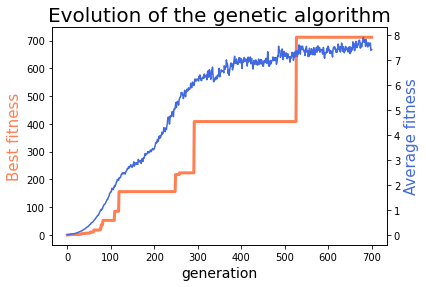

In [43]:
sizes = {
        "figureSize" : (12,8),
        "font_xs" : 5,
        "font_s" : 10,
        "font_m" : 15,
        "font_l" : 20,
        "lines" : 3
        }

df = DataFrame(ga.history)

fig, ax = plt.subplots()
ax2 = ax.twinx()

color1 = "coral"
color2 = "royalblue"

ax.plot(df["generation"],  df["best"],  color=color1, linewidth=sizes["lines"])
ax.set_ylabel("Best fitness", color=color1, fontsize=sizes["font_m"])

ax2.plot(df["generation"], df["average"], color=color2, )
ax2.set_ylabel("Average fitness", color=color2, fontsize=sizes["font_m"])

ax.set_xlabel("generation", fontsize = 14)

plt.title(f"Evolution of the genetic algorithm", fontsize=sizes["font_l"])
plt.xticks(fontsize=sizes["font_s"])
plt.yticks(fontsize=sizes["font_s"])
# plt.legend(fontsize=sizes["font_m"])

plt.show()